In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Initialization
A = np.array([[0.9993, 0.0785, 0.0014, -0.0001],
              [-0.0012, 0.9640, 0.0336, -0.0024],
              [-0.0645, -0.0026, 0.8716, -0.1283],
              [0.0060, 0.0002, 0.0000, 1.0000]])
B = np.array([[0.0001] ,[0.0024], [0.1283], [0.0000]])

alpha_a = 0.00003
alpha_c = 0.0002

##Model Free

In [122]:
# Model-free Value Iteration

#Wxx 4*4  Wxu 4*1
#Wux 1*4  Wuu 1*1
Wc = np.ones((5,5))

## Wa
Wa=np.zeros((1, 5))

# Q,R > 0
Q= np.random.rand(4, 4)
R= np.random.rand(1, 1)

# Use small random initial conditions x0
## Xk 4*1 then Uk 1*1
Xk0 = np.random.random((5, 1))

Zk = np.zeros((1, 5))
Zk1 = np.zeros((1, 5))

Mu = Wa @ Xk0

In [123]:
Xk_list = [Xk0]
Mu_list = [Mu]
Wa_list = [Wa]
Wc_list = [Wc]

k = 0
while True:
  #Update the Wa
    Wuu_c = np.array([[Wc_list[k][-1,-1]]])

    Mu = Wa_list[k] @ Xk_list[k]
    Mu_list.append (Mu)
    Mu_desire = - np.block([[np.linalg.inv(Wuu_c),Wc_list[k][-1,:-1]]]) @ Xk_list[k]

    Wa_list.append( Wa_list[k] - alpha_a * (((Mu) - (Mu_desire)) @ Xk_list[k].T ) )

    X = np.block([[A @ Xk_list[k][:-1] + B @ Mu_list[k][[-1]]] ,[Mu]])
    Xk_list.append( X )

    V = 0.5 * ( Xk_list[k].T @ Wc_list[k] @ Xk_list[k] )
    Vk1 = 0.5 * ( Xk_list[k+1].T @ Wc_list[k] @ Xk_list[k+1] )
    V_desire = 0.5 *( Xk_list[k][:-1].T @ Q @ Xk_list[k][:-1] + Mu_list[k][[-1]].T @ R @ Mu_list[k][[-1]] ) + Vk1

    Wc_list.append( Wc_list[k] - alpha_c * ( (V - V_desire) * ( Xk_list[k] @ Xk_list[k].T) ) )

    if np.array_equal(Wc_list[k+1] , Wc_list[k]) == True:
      print(k)
      break

    k = k + 1

1195


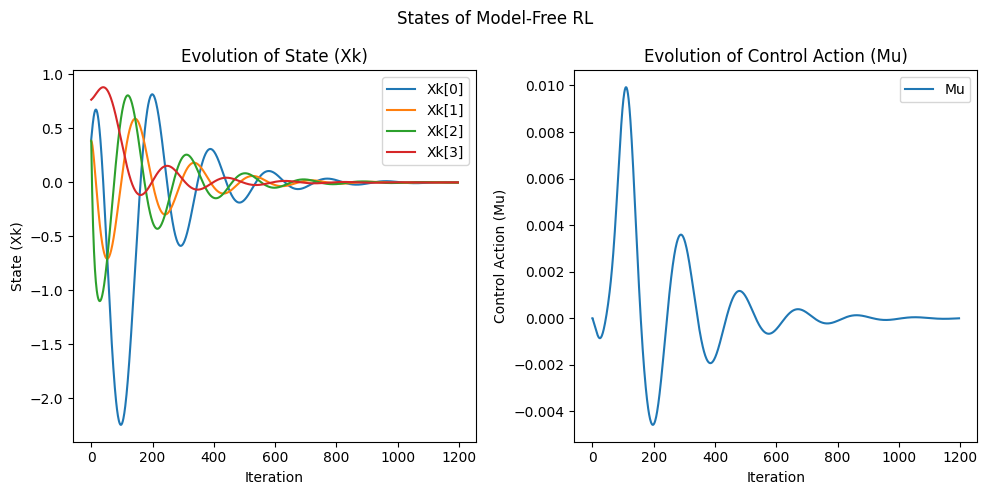

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Xk_list
axs[0].plot(range(k+2), [Xk[0] for Xk in Xk_list], label='Xk[0]')
axs[0].plot(range(k+2), [Xk[1] for Xk in Xk_list], label='Xk[1]')
axs[0].plot(range(k+2), [Xk[2] for Xk in Xk_list], label='Xk[2]')
axs[0].plot(range(k+2), [Xk[3] for Xk in Xk_list], label='Xk[3]')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('State (Xk)')
axs[0].set_title('Evolution of State (Xk)')
axs[0].legend()

# Plot Mu_list
axs[1].plot(range(k+2), [Mu[0] for Mu in Mu_list], label='Mu')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Control Action (Mu)')
axs[1].set_title('Evolution of Control Action (Mu)')
axs[1].legend()

plt.suptitle('States of Model-Free RL')
plt.tight_layout()
plt.show()

##Model Based

In [125]:
# Model Based Value Iteration

## Wc
Wc = np.ones((4,4))

## Wa
Wa=np.zeros((1, 4))

# Q,R > 0
Q= np.random.rand(4, 4)
R= np.random.rand(1, 1)

# Use small random initial conditions x0
Xk0 = np.random.random((4, 1))

Zk = np.zeros((1, 4))
Zk1 = np.zeros((1, 4))

Mu = Wa @ Xk0

In [126]:
Xk_list = [Xk0]
Mu_list = [Mu]
Wa_list = [Wa]
Wc_list = [Wc]

k = 0
while True:
  #Update the Wa
    Wuu_c = np.array([[Wc_list[k][-1,-1]]])

    Mu = Wa_list[k] @ Xk_list[k]
    Mu_list.append (Mu)
    Mu_desire = - ( np.linalg.inv(R) @ B.T @ Wc_list[k] @ Xk_list[k] )

    Wa_list.append( Wa_list[k] - alpha_a * (((Mu) - (Mu_desire)) @ Xk_list[k].T ) )

    X = A @ Xk_list[k] + B @ Mu_list[k]
    Xk_list.append( X )

    V = 0.5 * ( Xk_list[k].T @ Wc_list[k] @ Xk_list[k] )
    Vk1 = 0.5 * ( Xk_list[k+1].T @ Wc_list[k] @ Xk_list[k+1] )
    V_desire = 0.5 *( Xk_list[k].T @ Q @ Xk_list[k] + Mu_list[k].T @ R @ Mu_list[k] ) + Vk1

    Wc_list.append( Wc_list[k] - alpha_c * ( (V - V_desire) * ( Xk_list[k] @ Xk_list[k].T) ) )

    if np.array_equal(Wc_list[k+1] , Wc_list[k]) == True:
      print(k)
      break

    k = k + 1

1270


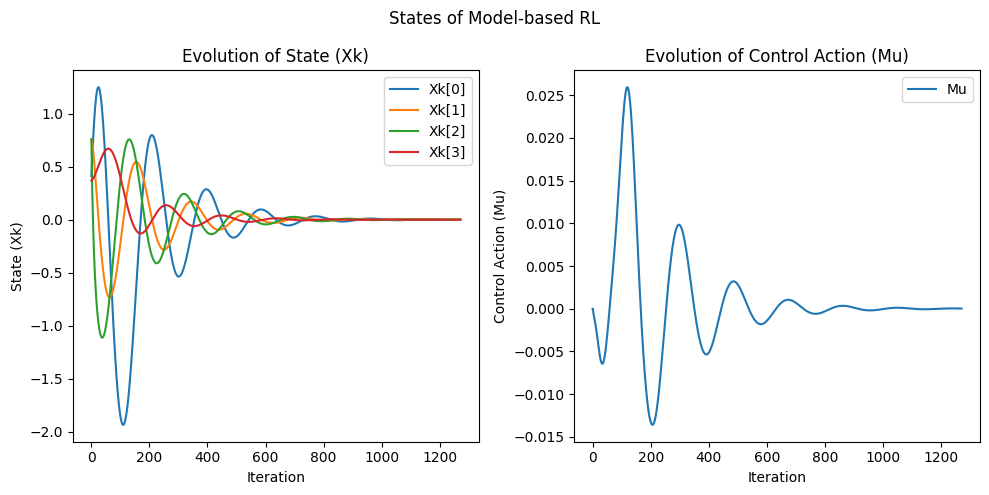

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Xk_list
axs[0].plot(range(k+2), [Xk[0] for Xk in Xk_list], label='Xk[0]')
axs[0].plot(range(k+2), [Xk[1] for Xk in Xk_list], label='Xk[1]')
axs[0].plot(range(k+2), [Xk[2] for Xk in Xk_list], label='Xk[2]')
axs[0].plot(range(k+2), [Xk[3] for Xk in Xk_list], label='Xk[3]')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('State (Xk)')
axs[0].set_title('Evolution of State (Xk)')
axs[0].legend()

# Plot Mu_list
axs[1].plot(range(k+2), [Mu[0] for Mu in Mu_list], label='Mu')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Control Action (Mu)')
axs[1].set_title('Evolution of Control Action (Mu)')
axs[1].legend()

plt.suptitle('States of Model-based RL')
plt.tight_layout()
plt.show()